The $k$-Means Algorithm
====================

Again, we start by generating some artificial data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import HTML
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

In [2]:
plt.jet() # set the color map. When your colors are lost, re-run this.
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=0)

As always, we first *plot* the data to get a feeling of what we're dealing with:

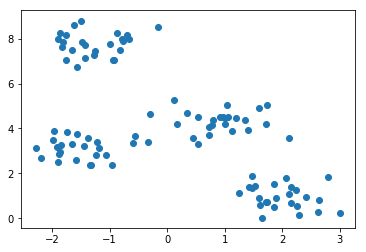

In [3]:
plt.scatter(X[:,0], X[:,1]);

The data looks like it may contain four different "types" of data point. 

In fact, this is how it was created above.

We can plot this information as well, using color:

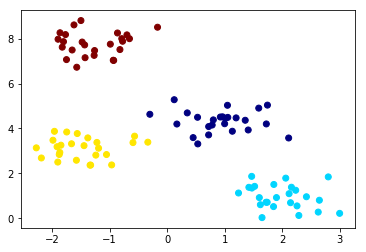

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y);

Normally, you do not know the information in `Y`, however.

You could try to recover it from the data alone.

This is what the kMeans algorithm does. 

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=8)
Y_hat = kmeans.fit(X).labels_

Now the label assignments should be quite similar to `Y`, up to a different ordering of the colors:

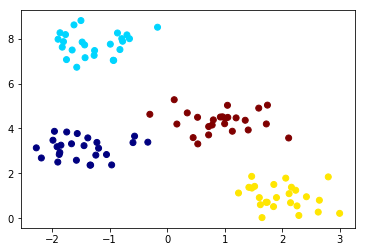

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y_hat);

Often, you're not so much interested in the assignments to the means. 

You'll want to have a closer look at the means $\mu$.

The means in $\mu$ can be seen as *representatives* of their respective cluster.

[[-1.47935679  3.11716896]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]]


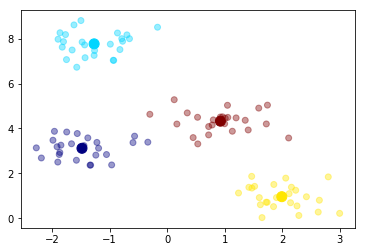

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print mu

## $k$-Means on Images

In this final example, we use the $k$-Means algorithm on the classical MNIST dataset.

The MNIST dataset contains images of hand-written digits. 

Let's first fetch the dataset from the internet (which may take a while, note the asterisk [*]):

In [9]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
X_digits, _,_, Y_digits = fetch_mldata("MNIST Original").values() # fetch dataset from internet
X_digits, Y_digits = shuffle(X_digits,Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

Let's have a look at some of the instances in the dataset we just loaded:

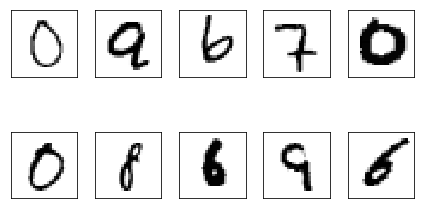

In [10]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in xrange(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

**Warning**: This takes quite a few seconds, so be patient until the asterisk [*] disappears!

In [17]:
kmeans = KMeans(12)
mu_digits = kmeans.fit(X_digits).cluster_centers_

Let's have a closer look at the means. Even though there are 10 digits, some of them are over/under-represented. Do you understand why?

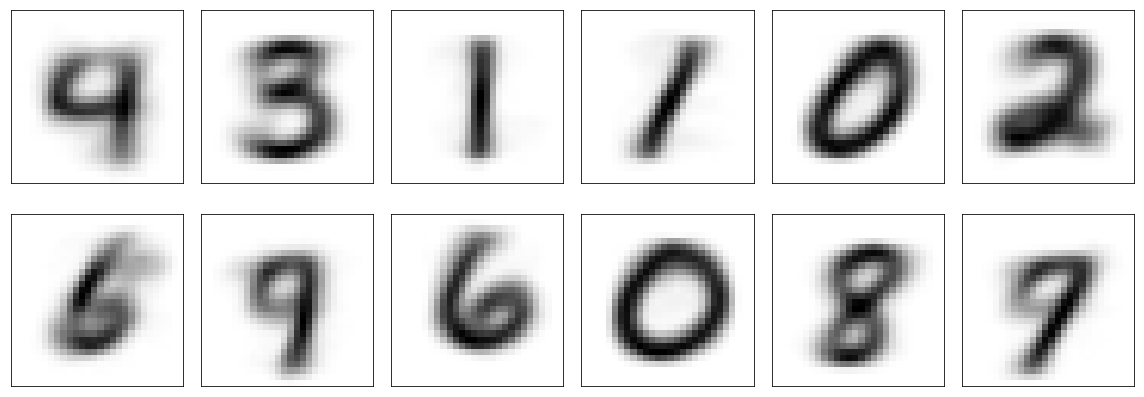

In [18]:
plt.figure(figsize=(16,6))
for i in xrange(2*(mu_digits.shape[0]/2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## Playing with $k$-Means

You can try other datasets to explore k-means : http://archive.ics.uci.edu/ml/ 

Try to get a feeling of how the algorithm proceeds.

Homework
==========================

Try to see what happens when you

- Increase the standard deviation of the clusters in this notebook
- Choose a "wrong" number of clusters by:
  1. changing the number of clusters generated
  2. changing the number of clusters used by KMeans

- What happens to result of the $k$-Means algorithm when you have multiplied one axis of the matrix $X$ with a large value?

  For example, the 0-th axis with 100:

  `X[:,0] *= 100`

  Why does the result change?

- Combine the $k$-Means algorithm with the PCA algorithm